Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [2]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)

Pandas version: 1.3.4
Numpy version: 1.26.4
Seaborn version: 0.12.2
Matplotlib version: 3.8.0
Statsmodels version: 0.14.0


In [3]:
df = pd.read_csv('ApplianceShipments.csv')
df.head()

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123


In [4]:
date = pd.date_range(start='1/1/1985', end='1/1/1990', freq='Q')
date

DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [5]:
df['Time_Stamp'] = date
df.head()

,Quarter,Year,Shipments,Time_Stamp
0,Q1,1985,4009,1985-03-31
1,Q2,1985,4321,1985-06-30
2,Q3,1985,4224,1985-09-30
3,Q4,1985,3944,1985-12-31
4,Q1,1986,4123,1986-03-31


In [6]:
df.set_index(keys='Time_Stamp',drop=True,inplace = True)
df.head()

,Quarter,Year,Shipments
Time_Stamp,,,
1985-03-31,Q1,1985,4009
1985-06-30,Q2,1985,4321
1985-09-30,Q3,1985,4224
1985-12-31,Q4,1985,3944
1986-03-31,Q1,1986,4123


In [7]:
df.drop(labels = ['Quarter', 'Year'], axis = 1, inplace=True)
df.head()

,Shipments
Time_Stamp,
1985-03-31,4009
1985-06-30,4321
1985-09-30,4224
1985-12-31,3944
1986-03-31,4123


In [8]:
# Plot the Time series data

In [9]:
from pylab import rcParams

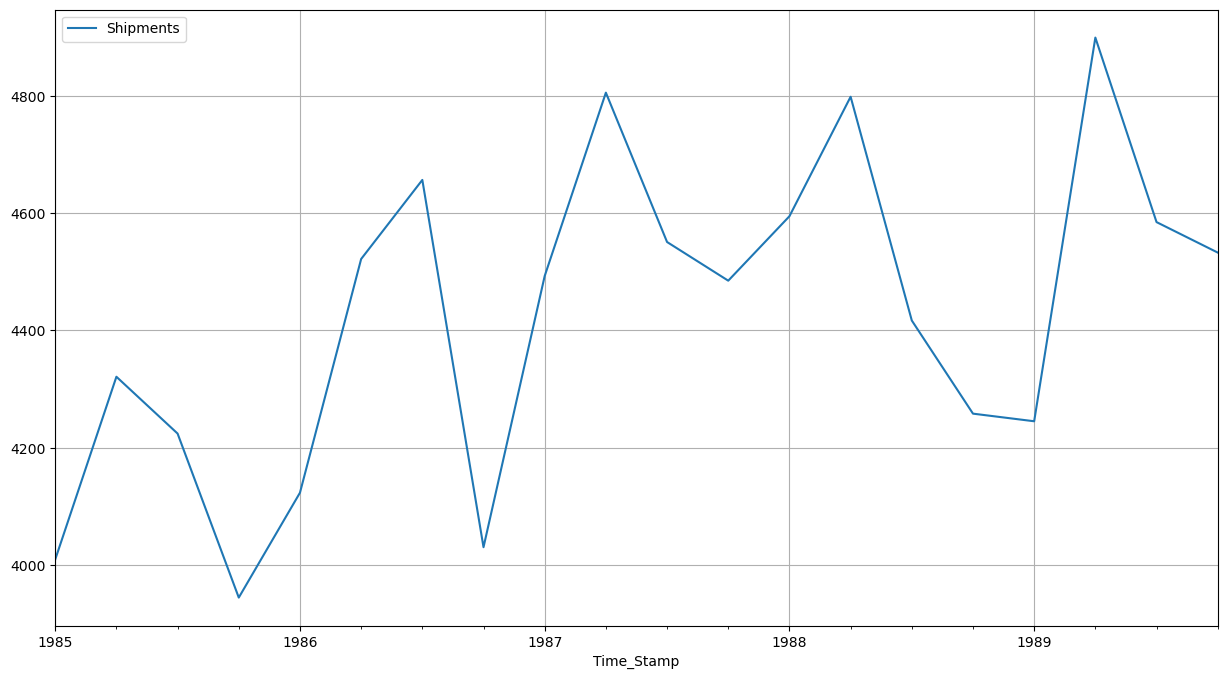

In [11]:
rcParams['figure.figsize'] = 15,8
df.plot()
plt.grid();

Find the basic measures of descriptive statistics for this time series across quarters of different years

In [12]:
df.describe()

,Shipments
count,20.000000
mean,4424.850000
std,274.089358
min,3944.000000
25%,4239.750000
50%,4489.000000
75%,4587.500000
max,4900.000000


3. Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency

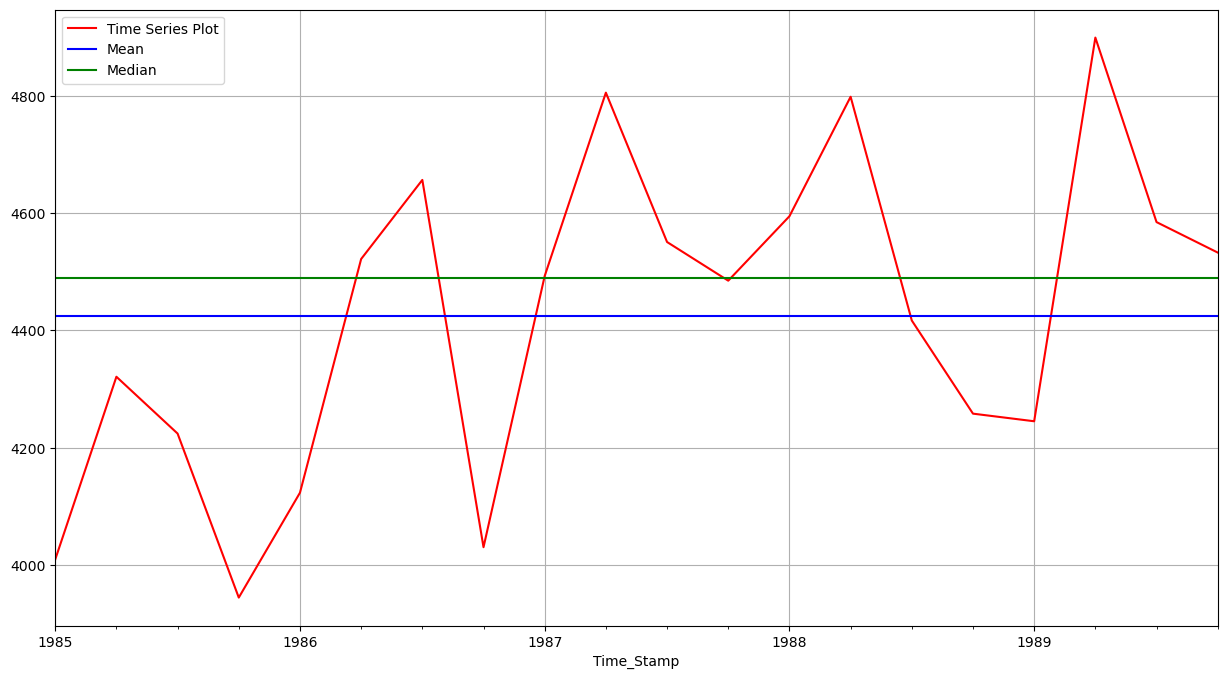

In [13]:
df.plot(color='Red')
plt.axhline(df['Shipments'].mean(),color='Blue')
plt.axhline(df['Shipments'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

4. Plot a quarterly comparison of the shipments using a barplot

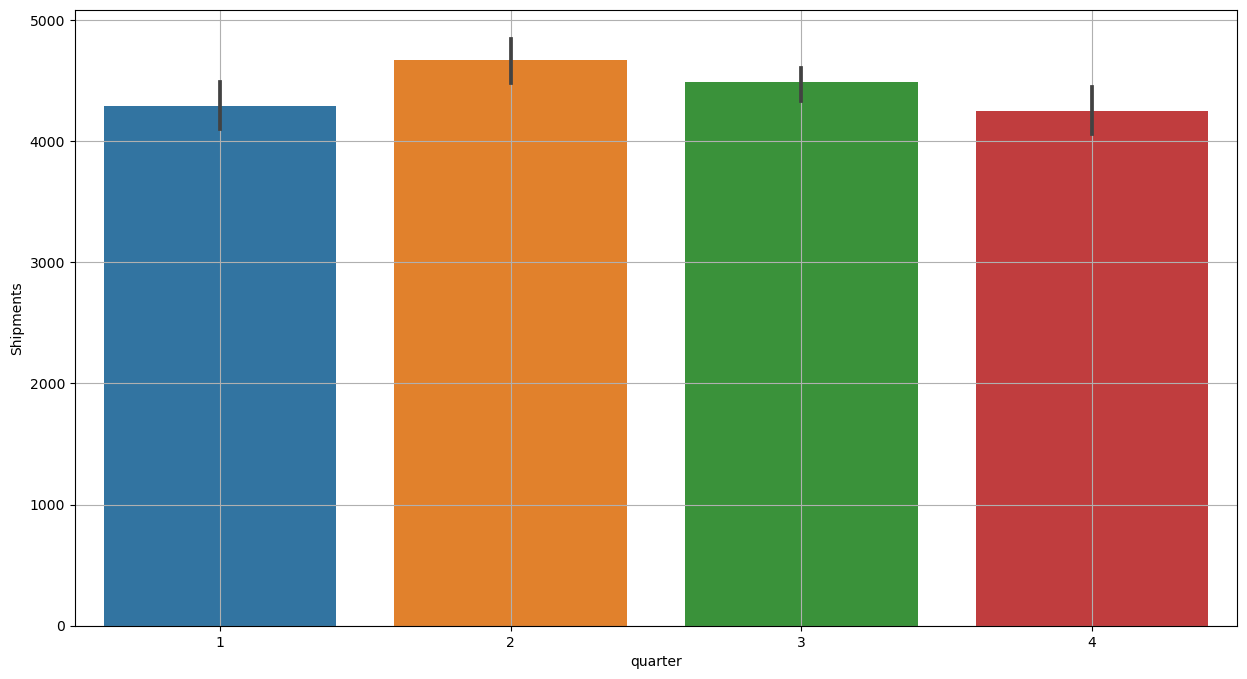

In [26]:
#sns.barplot(df.index.quarter,df.Shipments,data=df)
#plt.grid();
# Create a new column 'quarter' from the DataFrame's index if it's a DateTimeIndex.
df['quarter'] = df.index.quarter

# Now use seaborn's barplot function correctly.
sns.barplot(x='quarter', y='Shipments', data=df)
plt.grid()
plt.show()

In [17]:
df.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', name='Time_Stamp', freq=None)>

In [18]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Shipments', columns = df.index.month_name(), index = df.index.year)
quarterly_sales_across_years

Time_Stamp,December,June,March,September
Time_Stamp,,,,
1985,3944,4321,4009,4224
1986,4030,4522,4123,4657
1987,4485,4806,4493,4551
1988,4258,4799,4595,4417
1989,4533,4900,4245,4585


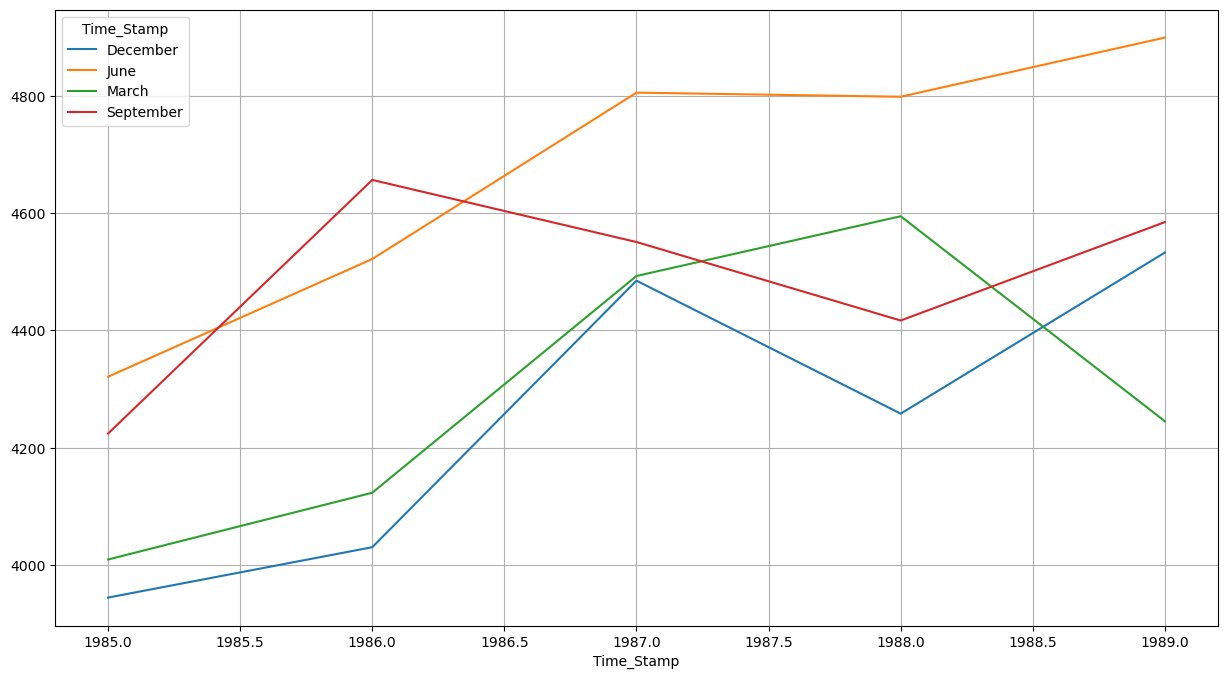

In [19]:
quarterly_sales_across_years.plot()
plt.grid()

6. Plot the distribution plot for quarterly comparison of the shipments

C:\Users\14495\AppData\Local\Temp\ipykernel_27592\1456935235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.index.quarter == 1]['Shipments'])
C:\Users\14495\AppData\Local\Temp\ipykernel_27592\1456935235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.index.quarter ==

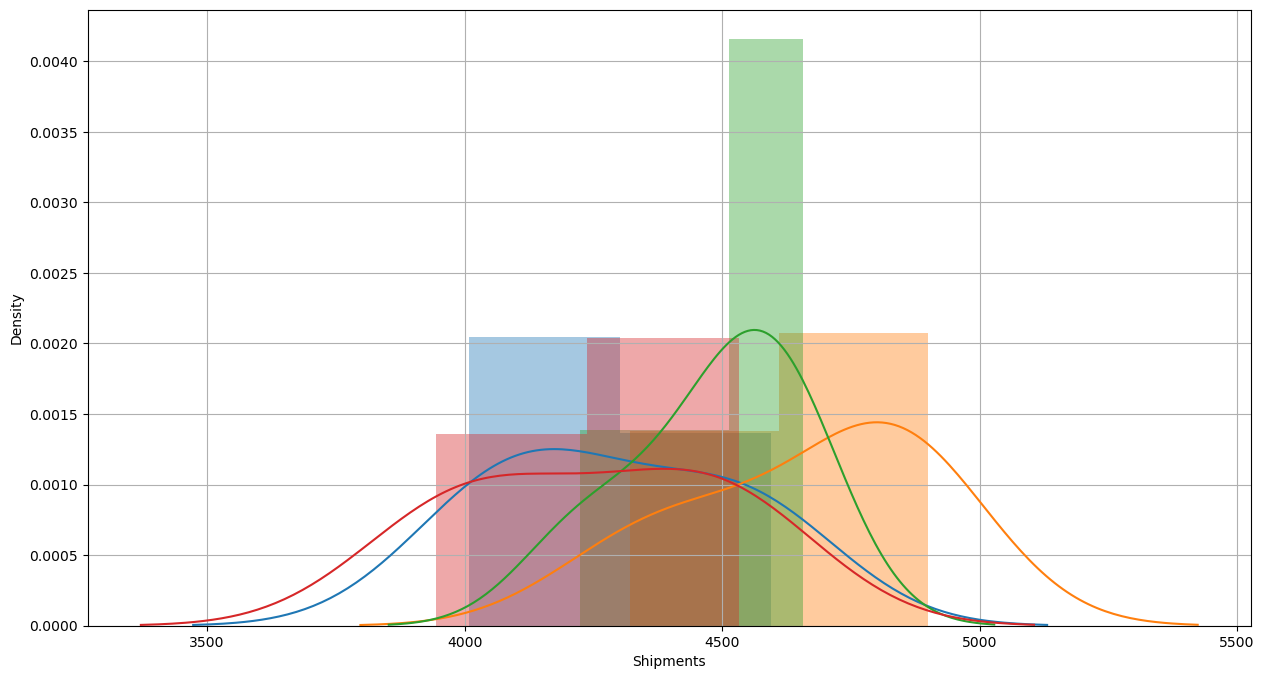

In [20]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'])
plt.grid();

C:\Users\14495\AppData\Local\Temp\ipykernel_27592\452976213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.index.quarter == 1]['Shipments'],hist=False)
C:\Users\14495\AppData\Local\Temp\ipykernel_27592\452976213.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

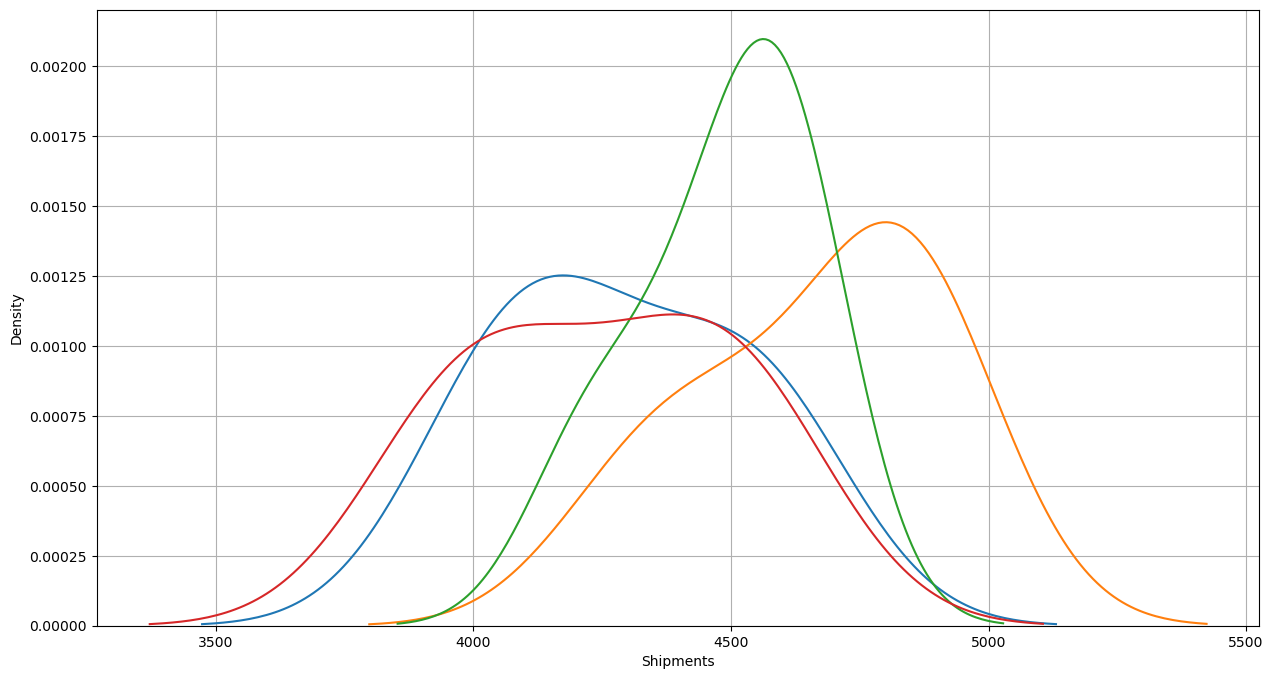

In [21]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'],hist=False)
plt.grid();

7. Decompose the data and check the trend, seasonality and the irregular/residual/error component

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose


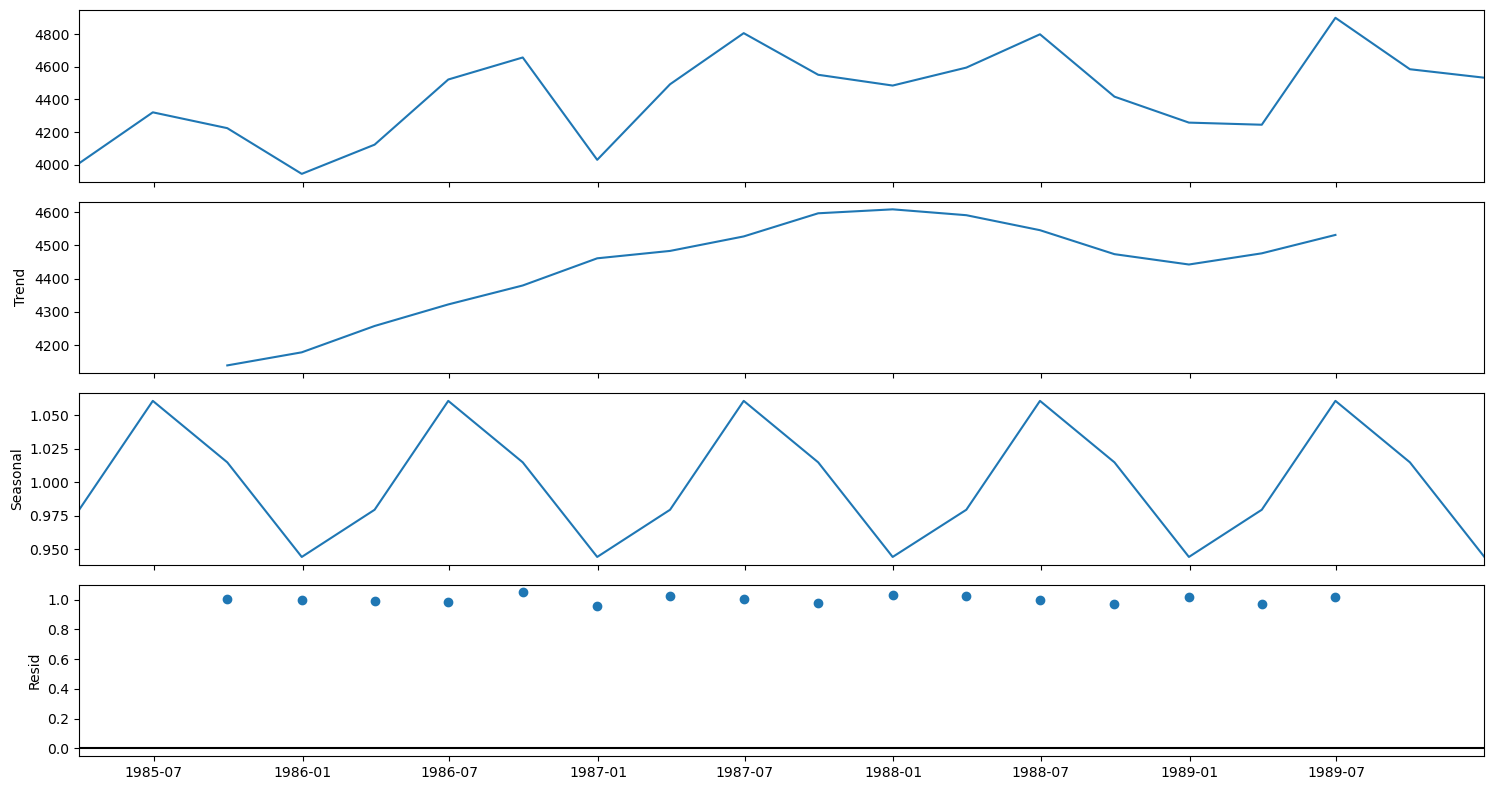

In [23]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [25]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1985-03-31         NaN
1985-06-30         NaN
1985-09-30    4138.750
1985-12-31    4178.125
1986-03-31    4257.375
1986-06-30    4322.250
1986-09-30    4379.250
1986-12-31    4461.000
1987-03-31    4483.250
1987-06-30    4526.875
1987-09-30    4596.500
1987-12-31    4608.375
1988-03-31    4590.750
1988-06-30    4545.625
1988-09-30    4473.500
1988-12-31    4442.375
1989-03-31    4476.000
1989-06-30    4531.375
1989-09-30         NaN
1989-12-31         NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1985-03-31    0.979648
1985-06-30    1.060879
1985-09-30    1.015027
1985-12-31    0.944446
1986-03-31    0.979648
1986-06-30    1.060879
1986-09-30    1.015027
1986-12-31    0.944446
1987-03-31    0.979648
1987-06-30    1.060879
1987-09-30    1.015027
1987-12-31    0.944446
1988-03-31    0.979648
1988-06-30    1.060879
1988-09-30    1.015027
1988-12-31    0.944446
1989-03-31    0.979648
1989-06-30    1.060879
1989-09-30    1.015027
1989-12-31    0.944446
Name: 